In [1]:
import cv2 #pip install opencv-python

In [2]:
import matplotlib.pyplot as plt #pip install matplotlib

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = [] ##empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2=127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 000002B043EF8430>

In [9]:
 img = cv2.imread('vehicle-traffic-object-detection-test-image.jpg') #vehicle-traffic-object-detection-test-image.jpg will be your test image

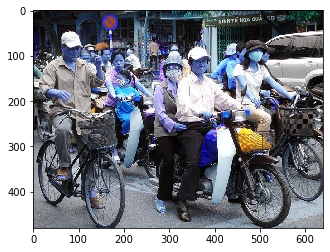

In [10]:
plt.imshow(img) ##bgr

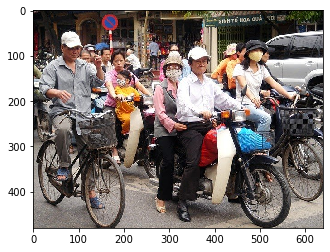

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [13]:
print(ClassIndex) 

[[1]
 [4]
 [1]
 [1]
 [1]
 [4]
 [2]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [14]:
font_scale =3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y), (x+w,y+h), (255, 0, 0), 2)
    #cv2.putText(img,text, (text_offset_x,text_offset_y),font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
    cv2.rectangle(img, boxes,(255, 0, 0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0, 255, 0), thickness=3)


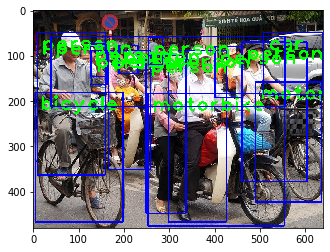

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

Video demo

In [16]:
cap = cv2.VideoCapture("input1.mp4") #input.mp4 will be your testing video.
#check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale =3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow("Object Detection Tutorial",frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllwindows()
                
            
        

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [64]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [64]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [64]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [64]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [64]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [64]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [64]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [64]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [64]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [15]]
[[ 1]
 [64]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [64]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [64]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [64]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [64]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [64]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [64]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [64]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[

 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [33]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1

 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [33]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [33]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [33]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [33]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [33]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]


error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-t9hleyt8\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
